In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
%config IPCompleter.greedy=True

## Reading data from file

In [372]:
from collections import Counter

data1 = pd.read_csv("20151219.txt", sep = "\t", header = None)
data1.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

data2 = pd.read_csv("20151220.txt", sep = "\t", header = None)
data2.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

data = data1.append(data2, ignore_index=True)

print(Counter(data["attack_flag"]))

Counter({-1: 338997, 1: 80149})


## Transform to binary

In [373]:
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-2, -1)
data.loc[:, "attack_flag"] = data.loc[:, "attack_flag"] * -1
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-1, 0)

print(Counter(data["attack_flag"]))

Counter({1: 338997, 0: 80149})


## Drop additional features

In [374]:
# slice dataset, drop additional features
print(data.shape)
data = data.drop(['start time', 'dst IP', 'src IP'], axis=1)
print(data.shape)

# drop software markers
data = data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
data["attack_flag"].value_counts()

(419146, 24)
(419146, 21)


1    338997
0     80149
Name: attack_flag, dtype: int64

In [375]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419146 entries, 0 to 419145
Data columns (total 18 columns):
conn len                       419146 non-null float64
service                        419146 non-null object
src bytes                      419146 non-null int64
dst bytes                      419146 non-null int64
conn numb                      419146 non-null int64
Same srv rate                  419146 non-null float64
Serror rate                    419146 non-null float64
Srv serror rate                419146 non-null float64
Dst host count                 419146 non-null int64
Dst host srv count             419146 non-null int64
Dst host same src port rate    419146 non-null float64
Dst host serror rate           419146 non-null float64
Dst host srv serror rate       419146 non-null float64
Conn state                     419146 non-null object
attack_flag                    419146 non-null int64
src port                       419146 non-null int64
dst port                 

In [376]:
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,Conn state,attack_flag,src port,dst port,proto
419136,0.000000,other,0,0,0,0.0,0.0,1.00,0,0,0.0,0.0,0.0,S0,1,54695,8081,tcp
419137,0.000000,other,0,0,0,0.0,0.0,0.00,1,1,0.0,1.0,1.0,S0,1,44997,21320,tcp
419138,0.485847,other,0,0,0,0.0,0.0,1.00,5,4,0.0,0.0,0.0,RSTR,1,65024,3389,tcp
419139,3.253905,other,0,0,0,0.0,0.0,0.50,1,39,1.0,1.0,1.0,S0,1,18399,25,tcp
419140,0.000000,other,0,0,0,0.0,0.0,0.67,4,4,1.0,1.0,1.0,S0,1,33863,20012,tcp
419141,0.000000,other,0,0,0,0.0,0.0,0.75,0,0,0.0,0.0,0.0,OTH,1,3,3,icmp
419142,3.135446,rdp,1726,5591,1,0.0,0.0,0.00,5,72,0.0,0.0,0.0,S1,1,62518,3389,tcp
419143,0.000000,other,0,0,0,0.0,0.0,0.60,0,2,0.0,0.0,1.0,S0,1,35137,123,udp
419144,0.000000,other,0,0,0,0.0,0.0,0.67,0,0,0.0,0.0,0.0,S0,1,42613,81,tcp
419145,0.000000,other,0,0,0,0.0,0.0,1.00,0,0,0.0,0.0,0.0,S0,1,42346,21320,tcp


In [377]:
data.describe()

,conn len,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,attack_flag,src port,dst port
count,419146.000000,4.191460e+05,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000
mean,0.897800,2.168004e+04,364.750896,2.522923,0.357259,0.064550,0.548421,25.437657,28.919419,0.073814,0.068824,0.153320,0.808780,34004.366686,3584.727816
std,4.749450,4.708272e+06,2285.497265,5.451557,0.477454,0.244823,0.462899,41.519257,42.252740,0.259441,0.252677,0.357215,0.393262,19713.691673,10928.964687
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12375.000000,23.000000
50%,0.000091,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,38884.000000,53.000000
75%,0.721284,4.500000e+01,77.000000,3.000000,1.000000,0.000000,1.000000,73.000000,92.000000,0.000000,0.000000,0.000000,1.000000,50359.000000,1433.000000
max,1061.910079,1.696585e+09,157723.000000,84.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,65535.000000,65507.000000


In [378]:
# removing NaNs
data = data.dropna()
data.shape

(419146, 18)

In [379]:
data["Conn state"].value_counts(dropna=False)

S0        247950
SF        104018
RSTO       26466
OTH        19608
REJ        15659
RSTRH       1853
RSTOS0      1514
SHR         1195
RSTR         778
S1           103
SH             2
Name: Conn state, dtype: int64

In [380]:
data["service"].value_counts(dropna=False)

other      259775
dns        102883
ssh         29769
sip         20915
rdp          3640
snmp         1096
smtp          999
dhcp           43
http           21
ssl             3
dns,sip         2
Name: service, dtype: int64

In [381]:
data["proto"].value_counts(dropna=False)

tcp     256581
udp     153868
icmp      8697
Name: proto, dtype: int64

# a bit of feature engineering

## port numbers classification

In [382]:
t1 = 1023  # well-known port numbers
t2 = 49151 # registered ports
t3 = 65535 # client ports

def wk(data_row):
    if (data_row["src port"] <= t1): 
        value = 1
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 0
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 0
    return value

def reg(data_row):
    if (data_row["src port"] <= t1): 
        value = 0
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 1
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 0
    return value

def cli(data_row):
    if (data_row["src port"] <= t1): 
        value = 0
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 0
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 1
    return value

data["well-known src pool"] = data.apply(wk, axis=1)
data["registered src pool"] = data.apply(reg, axis=1)
data["cli src pool"] = data.apply(cli, axis=1)

In [383]:
print(Counter(data["well-known src pool"]))
print(Counter(data["registered src pool"]))
print(Counter(data["cli src pool"]))

Counter({0: 406741, 1: 12405})
Counter({1: 291278, 0: 127868})
Counter({0: 303683, 1: 115463})


In [384]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419146 entries, 0 to 419145
Data columns (total 21 columns):
conn len                       419146 non-null float64
service                        419146 non-null object
src bytes                      419146 non-null int64
dst bytes                      419146 non-null int64
conn numb                      419146 non-null int64
Same srv rate                  419146 non-null float64
Serror rate                    419146 non-null float64
Srv serror rate                419146 non-null float64
Dst host count                 419146 non-null int64
Dst host srv count             419146 non-null int64
Dst host same src port rate    419146 non-null float64
Dst host serror rate           419146 non-null float64
Dst host srv serror rate       419146 non-null float64
Conn state                     419146 non-null object
attack_flag                    419146 non-null int64
src port                       419146 non-null int64
dst port                 

In [385]:
# data.loc[:, ["src port", "dst port", "well-known src pool", "registered src pool", "cli src pool", "well-known dst pool", "registered dst pool", "cli dst pool"]].head(30)
data.loc[:, ["src port", "dst port", "well-known src pool", "registered src pool", "cli src pool"]].head(30)

,src port,dst port,well-known src pool,registered src pool,cli src pool
0,40061,111,0,1,0
1,53488,80,0,0,1
2,35051,23,0,1,0
3,1408,445,0,1,0
4,55244,995,0,0,1
5,44544,995,0,1,0
6,50678,5900,0,0,1
7,35051,23,0,1,0
8,50678,5900,0,0,1
9,50678,5900,0,0,1


## Change port number info to categorical

In [386]:
data["src port"] = data["src port"].apply(str)
data["dst port"] = data["dst port"].apply(str)
print(data['src port'].nunique())
print(data['dst port'].nunique())

thresh1 = 230
thresh2 = 230
counts1 = data['src port'].value_counts()
counts2 = data['dst port'].value_counts()

repl1 = counts1[counts1 <= thresh1].index
repl2 = counts2[counts2 <= thresh2].index

#hot one encoding for src port numbers
data = pd.concat([data, pd.get_dummies(data["src port"].replace(repl1, 'other_src'), prefix="is_src")], axis=1)

#hot one encoding for dst port numbers
data = pd.concat([data, pd.get_dummies(data["dst port"].replace(repl2, 'other_dst'), prefix="is_dst")], axis=1)

56410
4462


In [387]:
data.shape

(419146, 267)

## Hot one encoding

In [388]:
### hot one encoding ###

# hot one encoding for service
data = pd.concat([data, pd.get_dummies(data["service"], prefix="is")], axis=1)
data.tail(10)

#hot one encoding for proto - commented due to reduced column number
data = pd.concat([data, pd.get_dummies(data["proto"], prefix="is")], axis=1)
data.tail(10)

# hot one encoding for conn state
data = pd.concat([data, pd.get_dummies(data["Conn state"], prefix="state")], axis=1)
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SH,state_SHR
419136,0.000000,other,0,0,0,0.0,0.0,1.00,0,0,...,0,0,0,0,0,1,0,0,0,0
419137,0.000000,other,0,0,0,0.0,0.0,0.00,1,1,...,0,0,0,0,0,1,0,0,0,0
419138,0.485847,other,0,0,0,0.0,0.0,1.00,5,4,...,0,0,0,1,0,0,0,0,0,0
419139,3.253905,other,0,0,0,0.0,0.0,0.50,1,39,...,0,0,0,0,0,1,0,0,0,0
419140,0.000000,other,0,0,0,0.0,0.0,0.67,4,4,...,0,0,0,0,0,1,0,0,0,0
419141,0.000000,other,0,0,0,0.0,0.0,0.75,0,0,...,0,0,0,0,0,0,0,0,0,0
419142,3.135446,rdp,1726,5591,1,0.0,0.0,0.00,5,72,...,0,0,0,0,0,0,1,0,0,0
419143,0.000000,other,0,0,0,0.0,0.0,0.60,0,2,...,0,0,0,0,0,1,0,0,0,0
419144,0.000000,other,0,0,0,0.0,0.0,0.67,0,0,...,0,0,0,0,0,1,0,0,0,0
419145,0.000000,other,0,0,0,0.0,0.0,1.00,0,0,...,0,0,0,0,0,1,0,0,0,0


In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419146 entries, 0 to 419145
Columns: 292 entries, conn len to state_SHR
dtypes: float64(7), int64(9), object(5), uint8(271)
memory usage: 178.7+ MB


## Plot function definition

In [390]:
# plotting method definition

def plot_stats(stat, name, width, rot):
    fig, ax = plt.subplots(figsize=(width, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=rot)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

## Dataset split

In [391]:
data.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool",
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                     "Conn state" : "Conn_state" 
                    }, inplace=True)

In [392]:
train, validate, test = np.split(data, [int(.7*len(data)), int(.85*len(data))])

train_ex = train
validate_ex = validate
test_ex = test

train = train.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
validate = validate.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
test = test.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)

train = train.sample(frac=1)
validate = validate.sample(frac=1)
test = test.sample(frac=1)

y_train = train.loc[:, "attack_flag"].values.ravel()
X_train = train.drop(["attack_flag"], axis=1).astype(np.float32)
y_validate = validate.loc[:, "attack_flag"].values.ravel()
X_validate = validate.drop(["attack_flag"], axis=1).astype(np.float32)
y_test = test.loc[:, "attack_flag"].values.ravel()
X_test = test.drop(["attack_flag"], axis=1).astype(np.float32)

print(Counter(y_test))
print(Counter(y_validate))
print(Counter(y_train))

Counter({1: 54763, 0: 8109})
Counter({1: 59796, 0: 3076})
Counter({1: 224438, 0: 68964})


# Algoritms performance comparison

In [232]:
from collections import Counter

print(Counter(y_test))

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}
FNR = {}

Counter({1: 54763, 0: 8109})


In [233]:
# Metrics of baseline method
from sklearn import metrics

name = "baseline"

if(y_test.mean() > (1-y_test.mean())):
    y_pred = np.ones(len(y_test)).ravel() 
else:
    y_pred = np.zeros(len(y_test)).ravel() 
    
Acc[name] = metrics.accuracy_score(y_test, y_pred)
F1S[name] = metrics.f1_score(y_test, y_pred)
Prec[name] = metrics.precision_score(y_test, y_pred)
Rec[name] = metrics.recall_score(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
FPR[name] = fp/(fp+tn)
FNR[name] = fn/(tp+fn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: baseline     Accuracy: 0.87102, F1-score: 0.93107, Precision: 0.87102, Recall: 1.00000, FPR: 1.00000, FNR: 0.00000
TN:   0; FP: 8109; FN:    0; TP: 54763



In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(solver = 'newton-cg')

model = clf.fit(X_train, y_train)

y_pred = model.predict(X_test)

name = "LogisticReg"

Acc[name] = metrics.accuracy_score(y_test, y_pred)
F1S[name] = metrics.f1_score(y_test, y_pred)
Prec[name] = metrics.precision_score(y_test, y_pred)
Rec[name] = metrics.recall_score(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
FPR[name] = fp/(fp+tn)
FNR[name] = fn/(tp+fn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: LogisticReg  Accuracy: 0.92776, F1-score: 0.95724, Precision: 0.98793, Recall: 0.92840, FPR: 0.07658, FNR: 0.07160
TN: 7488; FP: 621; FN: 3921; TP: 50842



In [235]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees, random_state = 0)
# # learning rate [1 - default] najlepsze wyniki
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


seed = 12
num_trees = 40

classifiers = {
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 13), n_estimators=num_trees, random_state = 0),
               "DecisionTree":DecisionTreeClassifier(random_state=0, max_depth = 13),
               "NaiveBayes":GaussianNB(),
               "RandomTree":BaggingClassifier(DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 13)),
               "RandomForest":make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=167, max_depth=38, random_state=0)),
}


for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    FNR[name] = fn/(tp+fn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: AdaBoost     Accuracy: 0.98082, F1-score: 0.98901, Precision: 0.98689, Recall: 0.99114, FPR: 0.08891, FNR: 0.00886
TN: 7388; FP: 721; FN:  485; TP: 54278

Algorithm: DecisionTree Accuracy: 0.97463, F1-score: 0.98555, Precision: 0.97777, Recall: 0.99346, FPR: 0.15255, FNR: 0.00654
TN: 6872; FP: 1237; FN:  358; TP: 54405

Algorithm: NaiveBayes   Accuracy: 0.86727, F1-score: 0.91772, Precision: 0.99739, Recall: 0.84984, FPR: 0.01505, FNR: 0.15016
TN: 7987; FP: 122; FN: 8223; TP: 46540

Algorithm: RandomTree   Accuracy: 0.97118, F1-score: 0.98363, Precision: 0.97351, Recall: 0.99396, FPR: 0.18264, FNR: 0.00604
TN: 6628; FP: 1481; FN:  331; TP: 54432



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: RandomForest Accuracy: 0.98176, F1-score: 0.98960, Precision: 0.98251, Recall: 0.99680, FPR: 0.11987, FNR: 0.00320
TN: 7137; FP: 972; FN:  175; TP: 54588



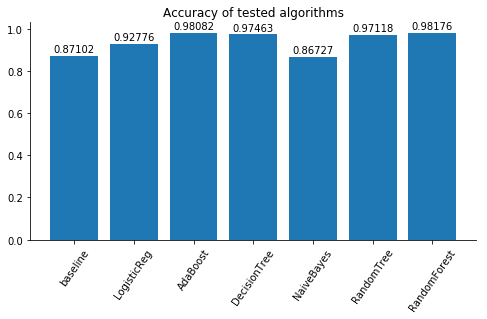

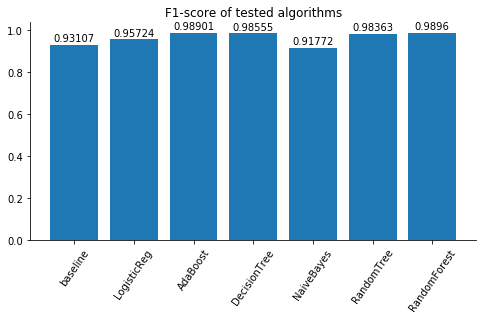

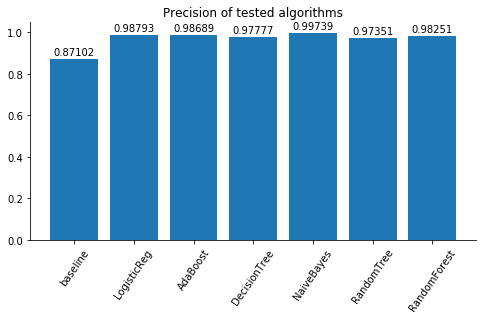

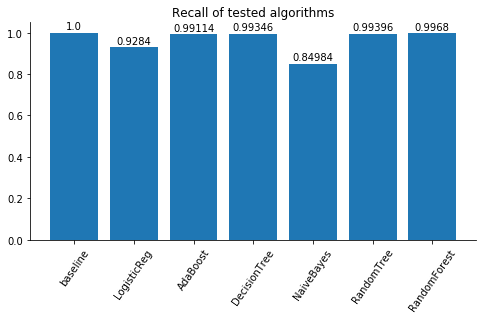

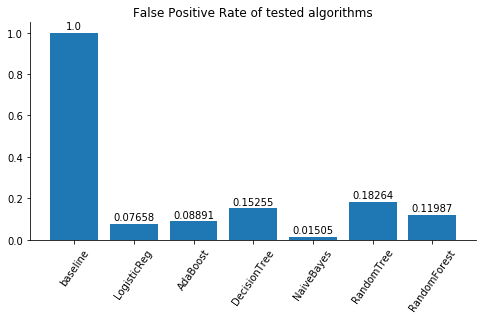

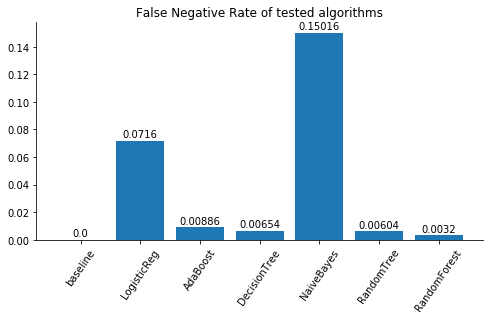

In [236]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)
plot_stats(FNR, "False Negative Rate", 8, 55)

# Random Features for Large-Scale Kernel Machines

In [237]:
import numpy as np
import tensorflow as tf
import time

In [238]:
X_train.values.shape

(293402, 286)

In [239]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(    
    x={"features": X_train.values},    
    y=y_train,    
    batch_size=180,    
    num_epochs=None,    
    shuffle=False)

In [240]:
X_validate.shape

(62872, 286)

In [241]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_validate.values},
    y=y_validate,
    batch_size=X_validate.shape[0],
    num_epochs=1,
    shuffle=False)

In [242]:
X_test.shape

(62872, 286)

In [243]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_test.values},
    y=y_test,
    batch_size=X_test.shape[0],
    num_epochs=1,
    shuffle=False)

## Using explicit kernel mappings with the linear model

In [393]:
data.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool", 
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                    "Conn state" : "Conn_state" 
                    }, inplace=True)

In [245]:
feat_column = tf.contrib.layers.real_valued_column('features', dimension=len(X_train.columns.values))

In [246]:
kernel_mapper = tf.contrib.kernel_methods.RandomFourierFeatureMapper(input_dim=len(X_train.columns.values), output_dim=3000, stddev=5, name='rffm')

In [247]:
kernel_mappers = {feat_column: [kernel_mapper]}

In [248]:
! rm -r kernel_train

In [249]:
optimizer = tf.train.FtrlOptimizer(learning_rate=30, l2_regularization_strength=0.01)

In [250]:
estimator_kernel = tf.contrib.kernel_methods.KernelLinearClassifier(
    n_classes=2,
    optimizer=optimizer,
    kernel_mappers=kernel_mappers, 
    model_dir="kernel_train")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f11f2f43a20>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'kernel_train'}


In [251]:
estimator_kernel.fit(input_fn=train_input_fn, steps=10000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into kernel_train/model.ckpt.
INFO:tensorflow:loss = 0.6931474, step = 1
INFO:tensorflow:global_step/sec: 165.542
INFO:tensorflow:loss = 0.07498501, step = 101 (0.605 sec)
INFO:tensorflow:global_step/sec: 177.754
INFO:tensorflow:loss = 0.043834057, step = 201 (0.562 sec)
INFO:tensorflow:global_step/sec: 178.638
INFO:tensorflow:loss = 0.07361633, step = 301 (0.560 sec)
INFO:tensorflow:global_step/sec: 175.867
INFO:tensorflow:loss = 0.039425515, step = 401 (0.568 sec)
INFO:tensorflow:global_step/sec: 178.733
INFO:tensorflow:loss = 0.06621093, step = 501 (0.560 sec)
INFO:tensorflow:global_step/sec: 180.053
INFO:tensorflow:loss = 0.06463543, step = 601 (0.555 sec)
INFO:tensorflow:global_step/sec: 181.203
INFO:tensorflow:loss = 0.050641526, step = 701 (0.552 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:loss = 0.0073607224, step = 7601 (0.553 sec)
INFO:tensorflow:global_step/sec: 176.236
INFO:tensorflow:loss = 0.011813828, step = 7701 (0.567 sec)
INFO:tensorflow:global_step/sec: 175.369
INFO:tensorflow:loss = 0.03877332, step = 7801 (0.570 sec)
INFO:tensorflow:global_step/sec: 174.692
INFO:tensorflow:loss = 0.009772851, step = 7901 (0.572 sec)
INFO:tensorflow:global_step/sec: 177.619
INFO:tensorflow:loss = 0.051316462, step = 8001 (0.563 sec)
INFO:tensorflow:global_step/sec: 179.268
INFO:tensorflow:loss = 0.0200385, step = 8101 (0.558 sec)
INFO:tensorflow:global_step/sec: 175.512
INFO:tensorflow:loss = 0.0062377797, step = 8201 (0.570 sec)
INFO:tensorflow:global_step/sec: 174.719
INFO:tensorflow:loss = 0.05605266, step = 8301 (0.572 sec)
INFO:tensorflow:global_step/sec: 180.483
INFO:tensorflow:loss = 0.0067392513, step = 8401 (0.554 sec)
INFO:tensorflow:global_step/sec: 177.931
INFO:tensorflow:loss = 0.020801803, step = 8501 (0.562 sec)
INFO:tensorflow:global_step/sec:

KernelLinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7f11f2f436a0>, 'feature_columns': {_RealValuedColumn(column_name='features_MAPPED', dimension=3000, default_value=None, dtype=tf.float32, normalizer=None)}, 'optimizer': <tensorflow.python.training.ftrl.FtrlOptimizer object at 0x7f11f2f43c18>, 'kernel_mappers': {_RealValuedColumn(column_name='features', dimension=286, default_value=None, dtype=tf.float32, normalizer=None): [<tensorflow.contrib.kernel_methods.python.mappers.random_fourier_features.RandomFourierFeatureMapper object at 0x7f11f2f43e10>]}})

In [252]:
eval_metrics = estimator_kernel.evaluate(input_fn=eval_input_fn, steps=1)

INFO:tensorflow:Starting evaluation at 2019-06-12-13:15:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-12-13:15:52
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.9449198, accuracy/baseline_label_mean = 0.9510752, accuracy/threshold_0.500000_mean = 0.9449198, auc = 0.86609143, auc_precision_recall = 0.9906777, global_step = 10000, labels/actual_label_mean = 0.9510752, labels/prediction_mean = 0.899043, loss = 0.17453441, precision/positive_threshold_0.500000_mean = 0.9713822, recall/positive_threshold_0.500000_mean = 0.97068363


In [253]:
for key,value in sorted(eval_metrics.items()):
  print('%s: %s' % (key, value))

accuracy: 0.9449198
accuracy/baseline_label_mean: 0.9510752
accuracy/threshold_0.500000_mean: 0.9449198
auc: 0.86609143
auc_precision_recall: 0.9906777
global_step: 10000
labels/actual_label_mean: 0.9510752
labels/prediction_mean: 0.899043
loss: 0.17453441
precision/positive_threshold_0.500000_mean: 0.9713822
recall/positive_threshold_0.500000_mean: 0.97068363


In [254]:
correctness = []
class_id = []
pred_iterator = None

In [255]:
pred_iterator = estimator_kernel.predict(input_fn = test_input_fn)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [256]:
for pred_dict in pred_iterator:
    class_id.append(pred_dict['classes'])
    #print(pred_dict)

In [257]:
name = "RFFM"

Acc[name] = metrics.accuracy_score(y_test, class_id)
F1S[name] = metrics.f1_score(y_test, class_id)
Prec[name] = metrics.precision_score(y_test, class_id)
Rec[name] = metrics.recall_score(y_test, class_id)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, class_id).ravel()
FPR[name] = fp/(fp+tn)
FNR[name] = fn/(tp+fn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RFFM         Accuracy: 0.95974, F1-score: 0.97702, Precision: 0.97151, Recall: 0.98260, FPR: 0.19460, FNR: 0.01740
TN: 6531; FP: 1578; FN:  953; TP: 53810



# Neural network part

In [394]:
import collections
import io
import math
import tensorflow as tf
from IPython import display

In [395]:
deep_numeric_feat = ["Same_srv_rate", "Serror_rate", "Srv_serror_rate", "Dst_host_count", "Dst_host_srv_count", "Dst_host_same_src_port_rate", "Dst_host_serror_rate", "Dst_host_srv_serror_rate", "well_known_src_pool", "registered_src_pool", "cli_src_pool"]
wide_numeric_feat = ["conn_len",  "src_bytes", "dst_bytes", "conn_numb"]
categorical_feat = ["service", "Conn_state", "src_port", "dst_port", "proto"]

In [396]:
deep_numeric_feat_tf = [tf.feature_column.numeric_column(k) for k in deep_numeric_feat]
wide_numeric_feat_tf = [tf.feature_column.numeric_column(k) for k in wide_numeric_feat]

In [397]:
src_port_mod = ["src_" + s for s in data["src_port"].unique().tolist()]
src_port = tf.feature_column.categorical_column_with_vocabulary_list(
    'src_port', src_port_mod)

dst_port_mod = ["dst_" + s for s in data["dst_port"].unique().tolist()]
dst_port = tf.feature_column.categorical_column_with_vocabulary_list(
    'dst_port', dst_port_mod)

service = tf.feature_column.categorical_column_with_vocabulary_list(
    'service', data["service"].unique().tolist())

Conn_state = tf.feature_column.categorical_column_with_vocabulary_list(
    'Conn_state', data["Conn_state"].unique().tolist())

proto = tf.feature_column.categorical_column_with_vocabulary_list(
    'proto', data["proto"].unique().tolist())

In [398]:
deep_columns = [
    tf.feature_column.indicator_column(service),
    tf.feature_column.indicator_column(Conn_state),
    tf.feature_column.indicator_column(proto),
    tf.feature_column.embedding_column(src_port, dimension=10),
    tf.feature_column.embedding_column(dst_port, dimension=6),
]

In [399]:
crossed_columns = [
      tf.feature_column.crossed_column(
          ['src_port', 'service'], hash_bucket_size=5000),
      tf.feature_column.crossed_column(
          ['dst_port', 'service'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['conn_len', 'src_bytes'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['conn_len', 'dst_bytes'], hash_bucket_size=10000),
      tf.feature_column.crossed_column(
          ['dst_port', 'conn_numb'], hash_bucket_size=10000),  
      tf.feature_column.crossed_column(
          ['service', 'proto'], hash_bucket_size=1000),
    
  ]

In [400]:
! rm -r NN_model2

In [401]:
NN_model = tf.estimator.DNNLinearCombinedClassifier(
    model_dir = "/home/matz/Desktop/ml_ids/NN_model2",
    #linear_optimizer = tf.train.FtrlOptimizer(learning_rate=3, l2_regularization_strength=0.001),
    linear_feature_columns = deep_columns + deep_numeric_feat_tf + wide_numeric_feat_tf + crossed_columns,
    dnn_activation_fn=tf.nn.selu,
    dnn_feature_columns = deep_columns + deep_numeric_feat_tf + wide_numeric_feat_tf,
    dnn_hidden_units = [2048, 1024]
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/home/matz/Desktop/ml_ids/NN_model2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f1213e14550>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [402]:
feature_set= deep_numeric_feat + wide_numeric_feat + categorical_feat

In [403]:
def get_input_fn(data_set, num_epochs=None, n_batch = 256, shuffle=True):
    return tf.estimator.inputs.pandas_input_fn(
       x=pd.DataFrame({k: data_set[k].values for k in feature_set}),
       y = pd.Series(data_set["attack_flag"].values),
       batch_size=n_batch,   
       num_epochs=num_epochs,
       shuffle=shuffle)

In [404]:
NN_model.train(input_fn=get_input_fn(train_ex, n_batch=180), steps=20000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /home/matz/Desktop/ml_ids/NN_model2/model.ckpt.
INFO:tensorflow:loss = 417.935, step = 1
INFO:tensorflow:global_step/sec: 36.7497
INFO:tensorflow:loss = 36.65182, step = 101 (2.722 sec)
INFO:tensorflow:global_step/sec: 42.4087
INFO:tensorflow:loss = 13.233688, step = 201 (2.358 sec)
INFO:tensorflow:global_step/sec: 42.0988
INFO:tensorflow:loss = 8.13615, step = 301 (2.375 sec)
INFO:tensorflow:global_step/sec: 42.359
INFO:tensorflow:loss = 9.335029, step = 401 (2.361 sec)
INFO:tensorflow:global_step/sec: 42.4342
INFO:tensorflow:loss = 19.275803, step = 501 (2.357 sec)
INFO:tensorflow:global_step/sec: 42.11
INFO:tensorflow:loss = 4.1052847, step = 601 (2.375 sec)
INFO:tensorflow:global_step/sec: 42.3129
INFO:t

INFO:tensorflow:global_step/sec: 42.0225
INFO:tensorflow:loss = 0.31525812, step = 8101 (2.379 sec)
INFO:tensorflow:global_step/sec: 42.2274
INFO:tensorflow:loss = 7.9066157, step = 8201 (2.368 sec)
INFO:tensorflow:global_step/sec: 41.2271
INFO:tensorflow:loss = 0.23836967, step = 8301 (2.426 sec)
INFO:tensorflow:global_step/sec: 41.5897
INFO:tensorflow:loss = 0.49869123, step = 8401 (2.404 sec)
INFO:tensorflow:global_step/sec: 41.8827
INFO:tensorflow:loss = 0.1534415, step = 8501 (2.388 sec)
INFO:tensorflow:global_step/sec: 42.3657
INFO:tensorflow:loss = 17.510006, step = 8601 (2.360 sec)
INFO:tensorflow:global_step/sec: 42.3699
INFO:tensorflow:loss = 11.830587, step = 8701 (2.360 sec)
INFO:tensorflow:global_step/sec: 41.9626
INFO:tensorflow:loss = 3.5563664, step = 8801 (2.383 sec)
INFO:tensorflow:global_step/sec: 42.0497
INFO:tensorflow:loss = 25.99097, step = 8901 (2.378 sec)
INFO:tensorflow:global_step/sec: 42.0447
INFO:tensorflow:loss = 8.719852, step = 9001 (2.379 sec)
INFO:tens

INFO:tensorflow:loss = 0.8221551, step = 16301 (2.388 sec)
INFO:tensorflow:global_step/sec: 42.0093
INFO:tensorflow:loss = 10.563806, step = 16401 (2.380 sec)
INFO:tensorflow:global_step/sec: 41.9606
INFO:tensorflow:loss = 6.4465065, step = 16501 (2.383 sec)
INFO:tensorflow:global_step/sec: 42.0792
INFO:tensorflow:loss = 9.259839, step = 16601 (2.376 sec)
INFO:tensorflow:global_step/sec: 42.2279
INFO:tensorflow:loss = 8.061024, step = 16701 (2.368 sec)
INFO:tensorflow:global_step/sec: 41.9195
INFO:tensorflow:loss = 6.570778, step = 16801 (2.386 sec)
INFO:tensorflow:global_step/sec: 41.9746
INFO:tensorflow:loss = 2.1221085, step = 16901 (2.382 sec)
INFO:tensorflow:global_step/sec: 42.1183
INFO:tensorflow:loss = 4.7548738, step = 17001 (2.374 sec)
INFO:tensorflow:global_step/sec: 42.0168
INFO:tensorflow:loss = 1.3440753, step = 17101 (2.380 sec)
INFO:tensorflow:global_step/sec: 41.7801
INFO:tensorflow:loss = 28.736416, step = 17201 (2.394 sec)
INFO:tensorflow:global_step/sec: 42.3509
INF

In [405]:
eval_metrics = NN_model.evaluate(input_fn=get_input_fn(validate_ex, n_batch=validate_ex.shape[0], shuffle=False), steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-12-16:39:54
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/matz/Desktop/ml_ids/NN_model2/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-06-12-16:39:59
INFO:tensorflow:Saving dict for global step 20000: accuracy = 0.6855198, accuracy_baseline = 0.9510752, auc = 0.70547944, auc_precision_recall = 0.9801119, average_loss = 0.65614486, global_step = 20000, label/mean = 0.9510752, loss = 41253.14, precision = 0.96783245, prediction/mean = 0.7577215, recall = 0.692354
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20000: /home/matz/Desktop/ml_ids/NN_model2/model.ckpt-20000


In [406]:
for key,value in sorted(eval_metrics.items()):
  print('%s: %s' % (key, value))

accuracy: 0.6855198
accuracy_baseline: 0.9510752
auc: 0.70547944
auc_precision_recall: 0.9801119
average_loss: 0.65614486
global_step: 20000
label/mean: 0.9510752
loss: 41253.14
precision: 0.96783245
prediction/mean: 0.7577215
recall: 0.692354


In [407]:
results = []
results = list(NN_model.predict(input_fn=get_input_fn(test_ex, num_epochs=1, n_batch = test_ex.shape[0], shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/matz/Desktop/ml_ids/NN_model2/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [408]:
y_pred = []
for el in results:
    y_pred.append(el["class_ids"])

y_pred_NN = [int(a) for a in y_pred]

In [409]:
from sklearn import metrics
name = "Wide&Deep"

Acc[name] = metrics.accuracy_score(test_ex["attack_flag"], y_pred_NN)
F1S[name] = metrics.f1_score(test_ex["attack_flag"], y_pred_NN)
Prec[name] = metrics.precision_score(test_ex["attack_flag"], y_pred_NN)
Rec[name] = metrics.recall_score(test_ex["attack_flag"], y_pred_NN)
tn, fp, fn, tp = metrics.confusion_matrix(test_ex["attack_flag"], y_pred_NN).ravel()
FPR[name] = fp/(fp+tn)
FNR[name] = fn/(tp+fn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: Wide&Deep    Accuracy: 0.95222, F1-score: 0.97225, Precision: 0.98379, Recall: 0.96098, FPR: 0.10692, FNR: 0.03902
TN: 7242; FP: 867; FN: 2137; TP: 52626



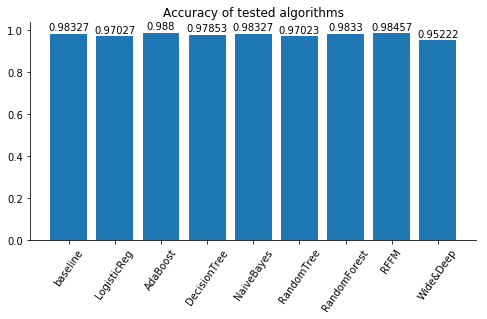

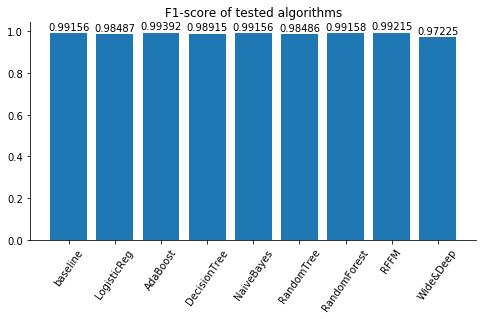

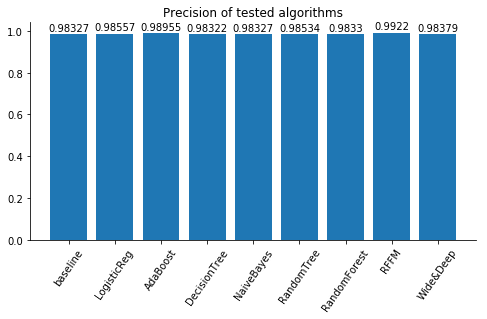

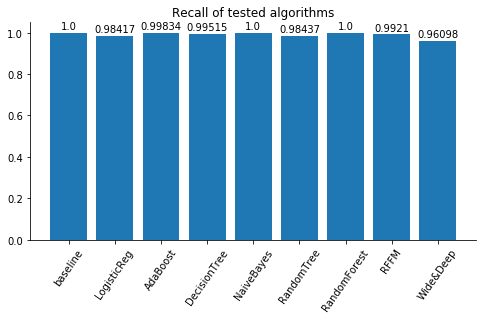

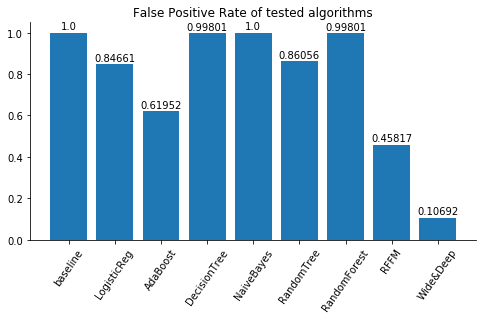

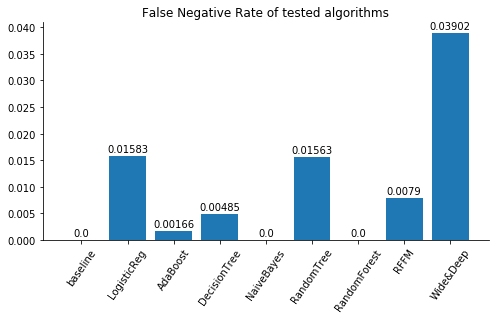

In [410]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)
plot_stats(FNR, "False Negative Rate", 8, 55)

## Results comparison

In [275]:
y_pred = {}

In [276]:
y_pred["RFFM"] = class_id
y_pred["Wide&Deep"] = y_pred_NN

In [277]:
# Metrics of baseline method

name = "baseline"

if(y_test.mean() > (1-y_test.mean())):
    y_pred["baseline"] = np.ones(len(y_test)).ravel() 
else:
    y_pred["baseline"] = np.zeros(len(y_test)).ravel()
        
y_pred["baseline"] = y_pred["baseline"].astype(int)

In [278]:
classifiers = {
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 13), n_estimators=num_trees, random_state = 0),
               "DecisionTree":DecisionTreeClassifier(random_state=0, max_depth = 13),
               "NaiveBayes":GaussianNB(),
               "RandomTree":BaggingClassifier(DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 13)),
               "RandomForest":make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=167, max_depth=38, random_state=0)),
              }

name = "LogisticReg"
model = LogisticRegression(solver = 'newton-cg').fit(X_train, y_train)
y_pred[name] = model.predict(X_test)

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred[name] = model.predict(X_test)

/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [279]:
for k in y_pred:
    print(k + str(len(y_pred[k])))

RFFM62872
Wide&Deep62872
baseline62872
LogisticReg62872
AdaBoost62872
DecisionTree62872
NaiveBayes62872
RandomTree62872
RandomForest62872


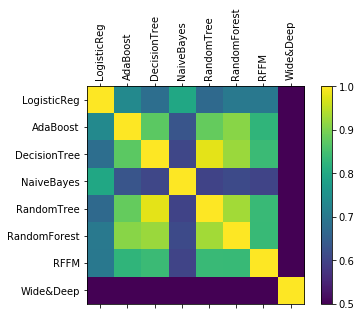

In [280]:
y_pred_pand = pd.DataFrame.from_dict(y_pred)
names = ["LogisticReg", "AdaBoost", "DecisionTree", "NaiveBayes", "RandomTree", "RandomForest", "RFFM", "Wide&Deep"]
correlations = y_pred_pand[names].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0.5, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [281]:
print(correlations)

              LogisticReg  AdaBoost  DecisionTree  NaiveBayes  RandomTree  \
LogisticReg      1.000000  0.736223      0.681495    0.796965    0.671064   
AdaBoost         0.736223  1.000000      0.874258    0.632475    0.881585   
DecisionTree     0.681495  0.874258      1.000000    0.607255    0.979087   
NaiveBayes       0.796965  0.632475      0.607255    1.000000    0.600572   
RandomTree       0.671064  0.881585      0.979087    0.600572    1.000000   
RandomForest     0.701221  0.911766      0.924282    0.612663    0.931205   
RFFM             0.700537  0.826565      0.840071    0.603339    0.839829   
Wide&Deep        0.002712 -0.002107     -0.001643    0.002297   -0.002140   

              RandomForest      RFFM  Wide&Deep  
LogisticReg       0.701221  0.700537   0.002712  
AdaBoost          0.911766  0.826565  -0.002107  
DecisionTree      0.924282  0.840071  -0.001643  
NaiveBayes        0.612663  0.603339   0.002297  
RandomTree        0.931205  0.839829  -0.002140  
Random

In [282]:
failures = {}
failures["baseline"] = []
failures["LogisticReg"] = []
failures["AdaBoost"] = []
failures["DecisionTree"] = []
failures["NaiveBayes"] = []
failures["RandomTree"] = []
failures["RandomForest"] = []
failures["RFFM"] = []
failures["Wide&Deep"] = []

for i in range(0, len(y_test)):
    for key in y_pred.keys():
        if y_pred[key][i] != y_test[i]:
            failures[key].append(10)
        else:
            failures[key].append(1)

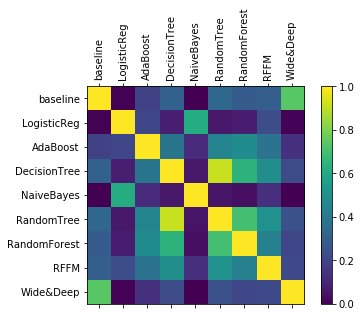

In [283]:
failures_pand = pd.DataFrame.from_dict(failures)
names = ["baseline", "LogisticReg", "AdaBoost", "DecisionTree", "NaiveBayes", "RandomTree", "RandomForest", "RFFM", "Wide&Deep"]
#names = ["baseline", "LogisticReg", "RandomForest"]
correlations = failures_pand[names].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [284]:
print(correlations)

              baseline  LogisticReg  AdaBoost  DecisionTree  NaiveBayes  \
baseline      1.000000     0.006450  0.195628      0.311228   -0.133475   
LogisticReg   0.006450     1.000000  0.214494      0.083524    0.619317   
AdaBoost      0.195628     0.214494  1.000000      0.388934    0.123356   
DecisionTree  0.311228     0.083524  0.388934      1.000000    0.068659   
NaiveBayes   -0.133475     0.619317  0.123356      0.068659    1.000000   
RandomTree    0.338340     0.068396  0.451398      0.917762    0.057346   
RandomForest  0.292199     0.080400  0.485216      0.646148    0.041950   
RFFM          0.302155     0.238220  0.382548      0.493401    0.133097   
Wide&Deep     0.740641     0.007839  0.142172      0.228836   -0.096606   

              RandomTree  RandomForest      RFFM  Wide&Deep  
baseline        0.338340      0.292199  0.302155   0.740641  
LogisticReg     0.068396      0.080400  0.238220   0.007839  
AdaBoost        0.451398      0.485216  0.382548   0.142172  
D

In [285]:
cont_table = [[],[]]
for name in failures.keys():
    print(Counter(failures[name]))
    cont_table[0].append(float(Counter(failures[name])[1]))
    cont_table[1].append(float(Counter(failures[name])[10]))
print(cont_table)

Counter({1: 54763, 10: 8109})
Counter({1: 58330, 10: 4542})
Counter({1: 61666, 10: 1206})
Counter({1: 61277, 10: 1595})
Counter({1: 54527, 10: 8345})
Counter({1: 61167, 10: 1705})
Counter({1: 61725, 10: 1147})
Counter({1: 60341, 10: 2531})
Counter({1: 51360, 10: 11512})
[[54763.0, 58330.0, 61666.0, 61277.0, 54527.0, 61167.0, 61725.0, 60341.0, 51360.0], [8109.0, 4542.0, 1206.0, 1595.0, 8345.0, 1705.0, 1147.0, 2531.0, 11512.0]]


In [286]:
from scipy import stats

# test of independence
# H0 : results are independent

stat, p, dof, expected = stats.chi2_contingency(cont_table)
stats.chi2_contingency(cont_table)
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('\nreject H0 - results dependent')
else:
    print('\nfailed to reject H0 - results independent')

probability=0.950, critical=15.507, stat=28405.719

reject H0 - results dependent


## New data prediction

In [411]:
test_set = pd.read_csv("20151221.txt", sep = "\t", header = None)
test_set.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

print(Counter(test_set["attack_flag"]))

Counter({-1: 210159, 1: 2830})


In [412]:
test_set.loc[:, "attack_flag"] = test_set.loc[:,"attack_flag"].replace(-2, -1)
test_set.loc[:, "attack_flag"] = test_set.loc[:, "attack_flag"] * -1
test_set.loc[:, "attack_flag"] = test_set.loc[:,"attack_flag"].replace(-1, 0)

print(Counter(test_set["attack_flag"]))

Counter({1: 210159, 0: 2830})


In [413]:
# slice dataset, drop additional features
print(test_set.shape)
test_set = test_set.drop(['start time', 'dst IP', 'src IP'], axis=1)
print(test_set.shape)

# drop software markers
test_set = test_set.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
test_set["attack_flag"].value_counts()

(212989, 24)
(212989, 21)


1    210159
0      2830
Name: attack_flag, dtype: int64

In [414]:
# removing NaNs
test_set = test_set.dropna()
test_set.shape

(212989, 18)

In [415]:
test_set["well-known src pool"] = test_set.apply(wk, axis=1)
test_set["registered src pool"] = test_set.apply(reg, axis=1)
test_set["cli src pool"] = test_set.apply(cli, axis=1)

In [416]:
test_set["src port"] = test_set["src port"].apply(str)
test_set["dst port"] = test_set["dst port"].apply(str)
test_set['src port'].nunique()
test_set['dst port'].nunique()

thresh1 = 125
thresh2 = 125
counts1 = test_set['src port'].value_counts()
counts2 = test_set['dst port'].value_counts()

repl1 = counts1[counts1 <= thresh1].index
repl2 = counts2[counts2 <= thresh2].index

#hot one encoding for src port numbers
test_set = pd.concat([test_set, pd.get_dummies(test_set["src port"].replace(repl1, 'other_src'), prefix="is_src")], axis=1)

#hot one encoding for dst port numbers
test_set = pd.concat([test_set, pd.get_dummies(test_set["dst port"].replace(repl2, 'other_dst'), prefix="is_dst")], axis=1)

In [417]:
### hot one encoding ###

# hot one encoding for service
test_set = pd.concat([test_set, pd.get_dummies(test_set["service"], prefix="is")], axis=1)
test_set.tail(10)

#hot one encoding for proto - commented due to reduced column number
test_set = pd.concat([test_set, pd.get_dummies(test_set["proto"], prefix="is")], axis=1)
test_set.tail(10)

# hot one encoding for conn state
test_set = pd.concat([test_set, pd.get_dummies(test_set["Conn state"], prefix="state")], axis=1)
test_set.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_OTH,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SHR
212979,0.000061,other,0,0,20,1.0,0.05,0.15,2,85,...,0,1,0,0,0,0,0,0,0,0
212980,0.000000,other,0,0,1,1.0,0.00,0.22,4,6,...,0,0,0,0,0,0,1,0,0,0
212981,0.000013,other,0,0,13,1.0,0.08,0.26,6,84,...,0,1,0,0,0,0,0,0,0,0
212982,0.000029,other,0,0,2,1.0,0.50,0.25,1,6,...,0,1,0,0,0,0,0,0,0,0
212983,0.000039,other,0,0,14,1.0,0.07,0.24,1,84,...,0,1,0,0,0,0,0,0,0,0
212984,0.000045,other,0,0,15,1.0,0.07,0.23,3,84,...,0,1,0,0,0,0,0,0,0,0
212985,0.000053,other,0,0,16,1.0,0.06,0.22,19,84,...,0,1,0,0,0,0,0,0,0,0
212986,0.000056,other,0,0,17,1.0,0.06,0.21,7,84,...,0,1,0,0,0,0,0,0,0,0
212987,0.000058,other,0,0,18,1.0,0.06,0.20,20,84,...,0,1,0,0,0,0,0,0,0,0
212988,0.000110,dns,36,194,1,1.0,0.00,0.50,0,89,...,0,0,0,0,0,0,0,0,1,0


In [418]:
test_set.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool",
                    "dst port" : "dst_port",
                    "src port" : "src_port",
                     "Conn state" : "Conn_state" 
                    }, inplace=True)

In [419]:
# check differences between datasets after hot one encoding

# print(train_data.columns.difference(test_data.columns)[0])
# columns that are not in test but are in train
test_new_data_full = test_set

# for c in data.columns.difference(test_set.columns):
#     test_set[c] = 0
# for c in test_set.columns.difference(data.columns):
#     test_set = test_set.drop(c, axis=1)
    
print(test_set.columns.difference(data.columns))  
test_set.shape

Index(['is_dst_102', 'is_dst_10200', 'is_dst_119', 'is_dst_143', 'is_dst_223',
       'is_dst_389', 'is_dst_5432', 'is_dst_6050', 'is_dst_631', 'is_dst_82',
       'is_dst_88', 'is_dst_9080', 'is_src_13941', 'is_src_18382',
       'is_src_21320', 'is_src_22055', 'is_src_22207', 'is_src_2295',
       'is_src_29174', 'is_src_300', 'is_src_37286', 'is_src_37396',
       'is_src_37511', 'is_src_38396', 'is_src_40082', 'is_src_40718',
       'is_src_41161', 'is_src_41287', 'is_src_41708', 'is_src_41793',
       'is_src_42206', 'is_src_443', 'is_src_4445', 'is_src_46432',
       'is_src_49354', 'is_src_49362', 'is_src_49376', 'is_src_49414',
       'is_src_5061', 'is_src_5071', 'is_src_5094', 'is_src_5100',
       'is_src_5114', 'is_src_51361', 'is_src_5208', 'is_src_5211',
       'is_src_52131', 'is_src_5229', 'is_src_5247', 'is_src_53265',
       'is_src_53451', 'is_src_53762', 'is_src_54110', 'is_src_54334',
       'is_src_54499', 'is_src_54509', 'is_src_5501', 'is_src_56118',
       'is_

(212989, 193)

In [420]:
test_new_data = test_set.loc[range(30000), :]

for c in data.columns.difference(test_new_data.columns):
    test_new_data[c] = 0
for c in test_new_data.columns.difference(data.columns):
    test_new_data = test_new_data.drop(c, axis=1)

test_new_data = test_new_data.drop(["service", "Conn_state", "proto", "src_port", "dst_port"], axis=1)
    
test_new_data = test_new_data.sample(frac=1)
y_test_new_data = test_new_data.loc[:, "attack_flag"].values.ravel()
X_test_new_data = test_new_data.drop(["attack_flag"], axis=1).astype(np.float32)

In [421]:
print(X_test_new_data.shape)
print(X_test.shape)
print(test_new_data["attack_flag"].value_counts())

(30000, 286)
(62872, 286)
1    29498
0      502
Name: attack_flag, dtype: int64


In [422]:
# Metrics of baseline method
from sklearn import metrics

name = "baseline"

if(y_test_new_data.mean() > (1-y_test_new_data.mean())):
    y_pred = np.ones(len(y_test_new_data)).ravel() 
else:
    y_pred = np.zeros(len(y_test_new_data)).ravel() 
    
Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
FPR[name] = fp/(fp+tn)
FNR[name] = fn/(tp+fn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: baseline     Accuracy: 0.98327, F1-score: 0.99156, Precision: 0.98327, Recall: 1.00000, FPR: 1.00000, FNR: 0.00000
TN:   0; FP: 502; FN:    0; TP: 29498



In [423]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(solver = 'newton-cg')

model = clf.fit(X_train, y_train)

y_pred = model.predict(X_test_new_data)

name = "LogisticReg"

Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
FPR[name] = fp/(fp+tn)
FNR[name] = fn/(tp+fn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: LogisticReg  Accuracy: 0.97027, F1-score: 0.98487, Precision: 0.98557, Recall: 0.98417, FPR: 0.84661, FNR: 0.01583
TN:  77; FP: 425; FN:  467; TP: 29031



In [424]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

seed = 12
num_trees = 28

classifiers = {
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 13), n_estimators=num_trees, random_state = 0),
               "DecisionTree":DecisionTreeClassifier(random_state=0, max_depth = 13),
               "NaiveBayes":GaussianNB(),
               "RandomTree":BaggingClassifier(DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 13)),
               "RandomForest":make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=167, max_depth=38, random_state=0)),
              }


for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test_new_data)
    
    Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
    F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
    Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
    Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    FNR[name] = fn/(tp+fn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: AdaBoost     Accuracy: 0.98800, F1-score: 0.99392, Precision: 0.98955, Recall: 0.99834, FPR: 0.61952, FNR: 0.00166
TN: 191; FP: 311; FN:   49; TP: 29449

Algorithm: DecisionTree Accuracy: 0.97853, F1-score: 0.98915, Precision: 0.98322, Recall: 0.99515, FPR: 0.99801, FNR: 0.00485
TN:   1; FP: 501; FN:  143; TP: 29355

Algorithm: NaiveBayes   Accuracy: 0.98327, F1-score: 0.99156, Precision: 0.98327, Recall: 1.00000, FPR: 1.00000, FNR: 0.00000
TN:   0; FP: 502; FN:    0; TP: 29498

Algorithm: RandomTree   Accuracy: 0.97023, F1-score: 0.98486, Precision: 0.98534, Recall: 0.98437, FPR: 0.86056, FNR: 0.01563
TN:  70; FP: 432; FN:  461; TP: 29037



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: RandomForest Accuracy: 0.98330, F1-score: 0.99158, Precision: 0.98330, Recall: 1.00000, FPR: 0.99801, FNR: 0.00000
TN:   1; FP: 501; FN:    0; TP: 29498



In [425]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_test_new_data.values},
    y=y_test_new_data,
    batch_size=X_test_new_data.shape[0],
    num_epochs=1,
    shuffle=False)

In [426]:
pred_iterator = estimator_kernel.predict(input_fn = test_input_fn)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [427]:
class_id = []

for pred_dict in pred_iterator:
    class_id.append(pred_dict['classes'])
    #print(pred_dict)

In [428]:
name = "RFFM"

Acc[name] = metrics.accuracy_score(y_test_new_data, class_id)
F1S[name] = metrics.f1_score(y_test_new_data, class_id)
Prec[name] = metrics.precision_score(y_test_new_data, class_id)
Rec[name] = metrics.recall_score(y_test_new_data, class_id)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, class_id).ravel()
FPR[name] = fp/(fp+tn)
FNR[name] = fn/(tp+fn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RFFM         Accuracy: 0.98457, F1-score: 0.99215, Precision: 0.99220, Recall: 0.99210, FPR: 0.45817, FNR: 0.00790
TN: 272; FP: 230; FN:  233; TP: 29265



In [429]:
results = []
results = list(NN_model.predict(input_fn=get_input_fn(test_new_data_full.loc[range(30000), :], num_epochs=1, n_batch = X_test.shape[0], shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/matz/Desktop/ml_ids/NN_model2/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [430]:
y_pred = []
for el in results:
    y_pred.append(el["class_ids"])
len(y_pred)

30000

In [431]:
name = "Wide&Deep"

Acc[name] = metrics.accuracy_score(y_test_new_data, y_pred)
F1S[name] = metrics.f1_score(y_test_new_data, y_pred)
Prec[name] = metrics.precision_score(y_test_new_data, y_pred)
Rec[name] = metrics.recall_score(y_test_new_data, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_new_data, y_pred).ravel()
FPR[name] = fp/(fp+tn)
FNR[name] = fn/(tp+fn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}, FNR: {6:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name], FNR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: Wide&Deep    Accuracy: 0.97497, F1-score: 0.98732, Precision: 0.98332, Recall: 0.99136, FPR: 0.98805, FNR: 0.00864
TN:   6; FP: 496; FN:  255; TP: 29243



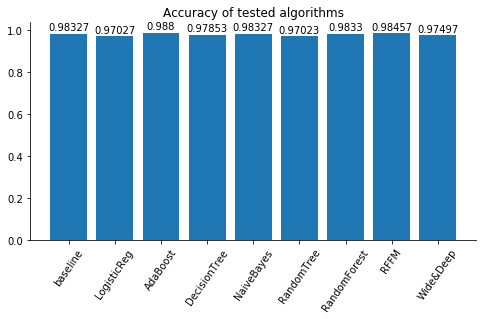

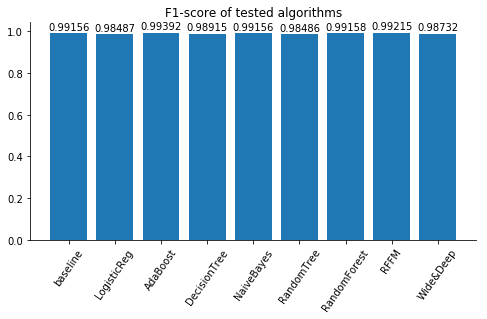

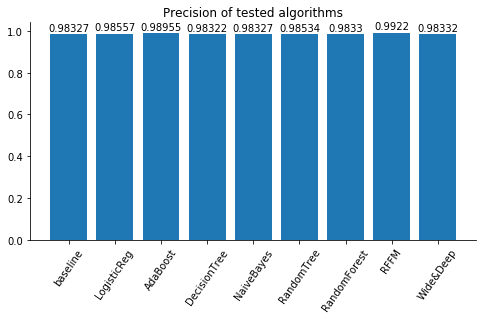

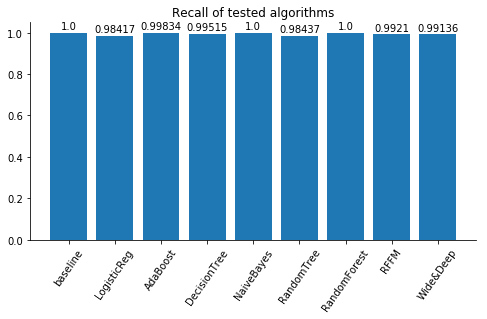

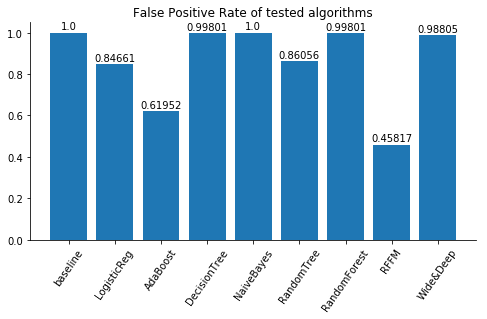

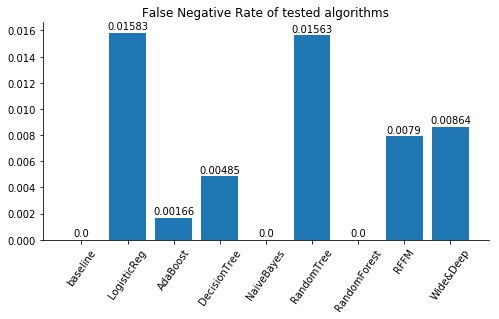

In [432]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)
plot_stats(FNR, "False Negative Rate", 8, 55)